# AUC curves Buyout

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
df = pd.read_csv("Data_BO.csv")
df.head(2)

,Final_Size_USD,Fund_Number_Overall,Fund_Number_Series,GDP_yoy,TR_10yrs,yoy_MSCI,Firm_Age,Funds_Raised_Last_Year,Pcent_Increase_Funds_Last_Year,Local_Currency_USD,Local_Currency_EUR,Fund_Focus_US,Fund_Focus_Europe,Fund_Focus_Asia,Geographic_Scope_Diversified,Industry_Diversified,PME
0,-0.465584,2,2,0.648995,1.779812,-1.012005,-0.771516,-1.778528,3.197683,1,0,1,0,0,0,0,0.0
1,-0.489999,4,3,0.853648,0.929423,0.944443,-0.202245,-0.882312,0.176394,1,0,1,0,0,0,0,1.0


In [3]:
feature_cols = df.columns[df.columns != "PME"]
X = df[feature_cols]
y = df["PME"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, stratify=y, random_state = 0)

C:\Users\rishi\.conda\envs\jupLab\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


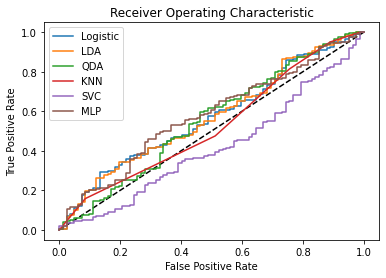

In [4]:
#ROC Curve
from sklearn.metrics import roc_curve
log_reg= LogisticRegression(random_state=0)
log_reg.fit(X_train,y_train)
y_pred_prob1 = log_reg.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_prob2 = lda.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_prob3 = qda.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)


knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_prob4 = knn.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)


svc = SVC(kernel='linear', probability=True, random_state=0)
svc.fit(X_train, y_train)
y_pred_prob5 = svc.predict_proba(X_test)[:,1]
fpr5 , tpr5, thresholds5 = roc_curve(y_test, y_pred_prob5)

mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train, y_train)
y_pred_prob6 = mlp.predict_proba(X_test)[:,1]
fpr6, tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic")
plt.plot(fpr2, tpr2, label= "LDA")
plt.plot(fpr3, tpr3, label = 'QDA')
plt.plot(fpr4, tpr4, label = "KNN")
plt.plot(fpr5, tpr5, label = 'SVC')
plt.plot(fpr6, tpr6, label = 'MLP')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.savefig("BO_comp_AUC.png")
plt.show()